In [11]:
import jax
import equinox as eqx
import jax.numpy as jnp
from functools import partial

In [41]:
class Test(eqx.Module):
    a: jax.Array
    
    def __init__(self):
        self.a = jnp.array(1)

    def __call__(self, x):
        return x + self.a
    
    def add_double(self, x):
        return x + self.a * 2
    
test = Test()
test(5)

vmap_test = jax.vmap(test.__call__)
jit_test = jax.jit(test.__call__)

In [58]:
test_2 = Test()
test_2 = eqx.tree_at(lambda x: x.a, test_2, 10)

type(test).__call__(test_2, 5)

15

In [42]:
jit_test

<PjitFunction of <bound method Test.__call__ of Test(a=i32[])>>

In [39]:
vmap_test = jax.vmap(test.__call__)

In [54]:
jit_test(5)

Array(6, dtype=int32, weak_type=True)

In [51]:
test = eqx.tree_at(lambda x: x.a, test, test.a + 1)

In [40]:
vmap_test(jnp.array([5, 7]))

Array([ 8, 10], dtype=int32)

In [1]:
import jax
import matplotlib.pyplot as plt
import xminigrid
from xminigrid.wrappers import DmEnvAutoResetWrapper, GymAutoResetWrapper
from xminigrid.experimental.img_obs import RGBImgObservationWrapper

/home/edan/miniconda3/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-18 18:40:43.513160: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


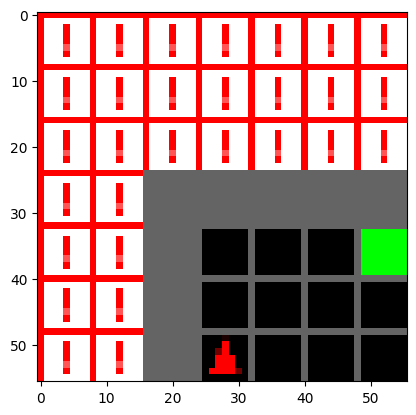

In [5]:
key = jax.random.key(0)
reset_key, ruleset_key = jax.random.split(key)

# to list available environments: xminigrid.registered_environments()
env, env_params = xminigrid.make('MiniGrid-Empty-6x6')
# env_params = env_params.replace(view_size=4)

# auto-reset wrapper
env = DmEnvAutoResetWrapper(env)
env = RGBImgObservationWrapper(env)

reset_fn = jax.jit(env.reset)
step_fn = jax.jit(env.step)

# fully jit-compatible step and reset methods
env_state = reset_fn(env_params, reset_key)
env_state = step_fn(env_params, env_state, action=0)

plt.imshow(env_state.observation[::4, ::4])

In [17]:
# env, env_params = xminigrid.make('MiniGrid-Empty-6x6')

env.num_actions(env_params)

6

In [8]:
# env.observation_shape(env_params)
env.num_actions(env_params)

6

True


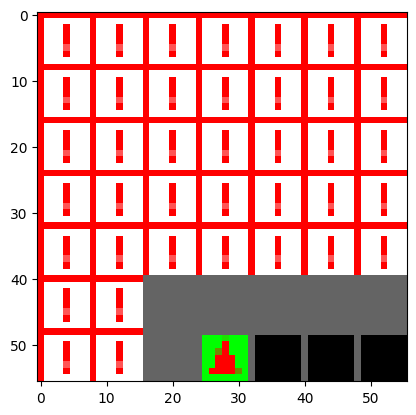

In [11]:
for _ in range(1):
    env_state = step_fn(env_params, env_state, action=0)
plt.imshow(env_state.observation[::4, ::4])
print(env_state.last())

In [13]:
env_state.reward

Array(0.95625, dtype=float32, weak_type=True)

In [18]:
env_state.observation[::4, ::4].shape

(56, 56, 3)

In [4]:

# optionally render the state
env.render(env_params, env_state).shape

(192, 192, 3)